In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
vinho = pd.read_csv('qualidade.csv')
vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
vinho.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
vinho.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
vinho.duplicated().sum()


np.int64(240)

In [13]:
vinho = vinho.drop_duplicates(keep='first')

In [14]:
vinho.duplicated().sum()

np.int64(0)

## Análise Exploratória de Dados
Esta é a fase de descoberta. Vamos visualizar os dados para extrair insights, entender a distribuição da nossa variável-alvo (`quality`) e identificar as características que mais se correlacionam com a qualidade de um bom vinho.

C:\Users\desen\AppData\Local\Temp\ipykernel_12788\2528490554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=vinho, palette='viridis')


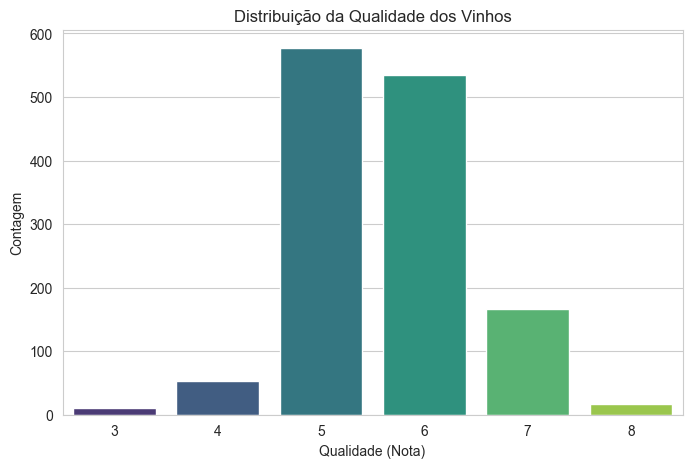

In [16]:
# Contagem de vinhos por nota de qualidade
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=vinho, palette='viridis')
plt.title('Distribuição da Qualidade dos Vinhos')
plt.xlabel('Qualidade (Nota)')
plt.ylabel('Contagem')
plt.show()

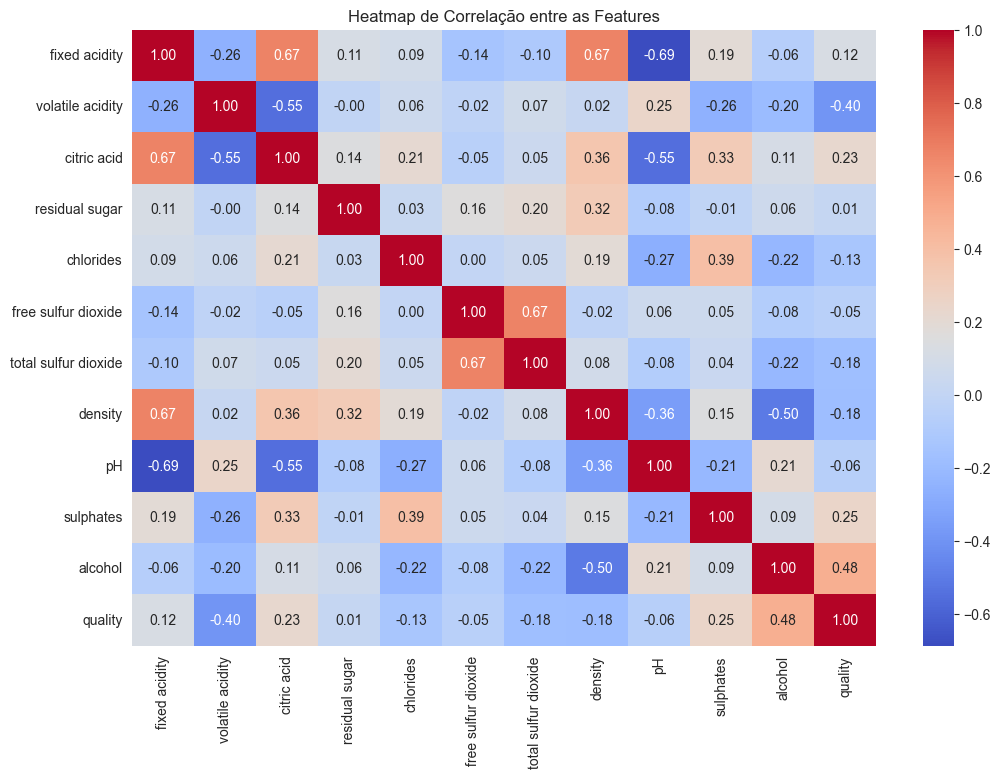

In [17]:
# Heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(vinho.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre as Features')
plt.show()

C:\Users\desen\AppData\Local\Temp\ipykernel_12788\2887711714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=vinho, palette='muted')


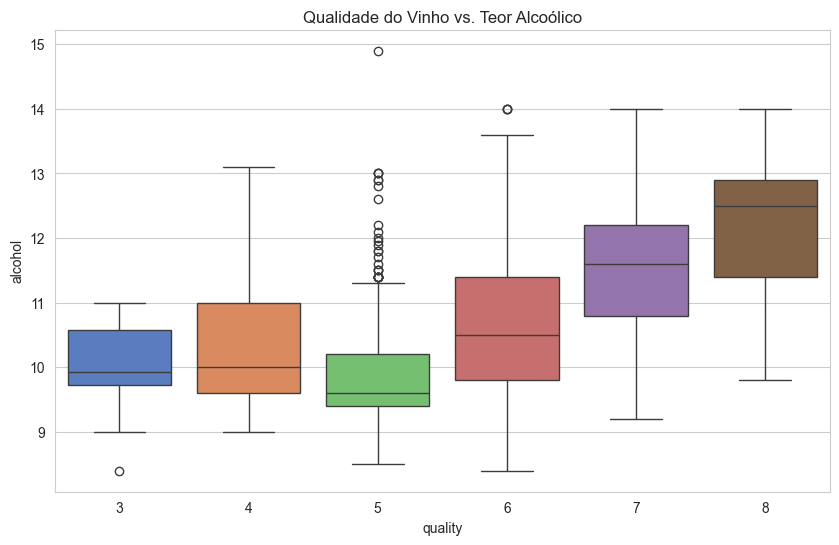

In [19]:
# Relação entre Álcool e Qualidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=vinho, palette='muted')
plt.title('Qualidade do Vinho vs. Teor Alcoólico')
plt.show()

## Engenharia de Features e Pré-processamento
Nesta etapa, preparamos os dados para o modelo de Machine Learning. Isso inclui:
- Transformar nossa variável alvo `quality` em categorias (Ruim, Médio, Bom).
- Separar o conjunto de dados em features (X) e alvo (y).
- Dividir os dados em conjuntos de treino e teste.
- Padronizar as features para que todas tenham a mesma escala.

In [20]:
# Criar a coluna 'quality_category'
vinho['quality_category'] = pd.cut(vinho['quality'],
                                     bins=[0, 4, 6, 10],
                                     labels=['Ruim', 'Médio', 'Bom'])

# Remover a coluna 'quality' original
vinho = vinho.drop('quality', axis=1)

# Verificar a distribuição da nova categoria
print(vinho['quality_category'].value_counts())

quality_category
Médio    1112
Bom       184
Ruim       63
Name: count, dtype: int64


C:\Users\desen\AppData\Local\Temp\ipykernel_12788\1622399948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinho['quality_category'] = pd.cut(vinho['quality'],


In [22]:
X = vinho.drop('quality_category', axis=1)
y = vinho['quality_category']

## Construção e Treinamento do Modelo Preditivo
Com os dados preparados, vamos escolher, instanciar e treinar nosso modelo de classificação. Utilizaremos o `RandomForestClassifier` por sua robustez e capacidade de lidar com relações complexas nos dados.

In [23]:
# Dividir em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# 'stratify=y' garante que a proporção das categorias seja a mesma nos conjuntos de treino e teste

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Usar o mesmo scaler treinado nos dados de treino

In [25]:
# Instanciar e treinar o modelo
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Avaliação da Performance do Modelo
Após o treinamento, precisamos verificar o quão bem o nosso modelo performou. Utilizaremos o conjunto de teste (dados que o modelo nunca viu) para avaliar as previsões usando métricas como o relatório de classificação e a matriz de confusão.

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.65      0.41      0.50        37
       Médio       0.86      0.95      0.90       222
        Ruim       0.00      0.00      0.00        13

    accuracy                           0.83       272
   macro avg       0.50      0.45      0.47       272
weighted avg       0.79      0.83      0.80       272



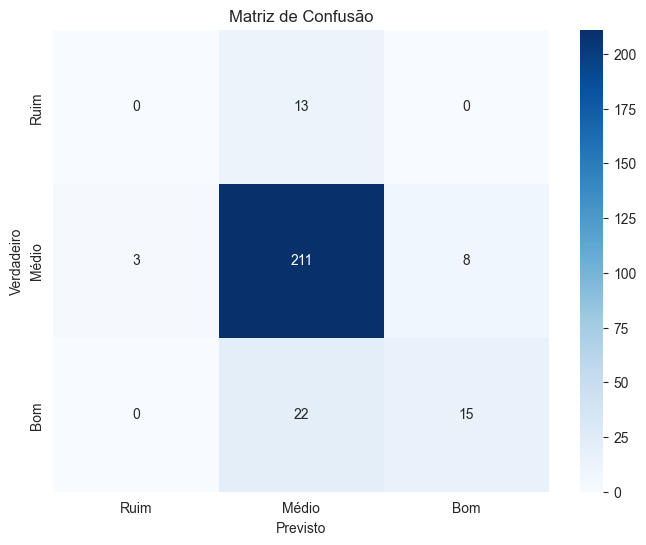

In [26]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Exibir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=['Ruim', 'Médio', 'Bom'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ruim', 'Médio', 'Bom'],
            yticklabels=['Ruim', 'Médio', 'Bom'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

## Análise de Importância das Features
Uma das grandes vantagens de modelos como o Random Forest é a capacidade de extrair a importância de cada feature. Vamos visualizar quais características físico-químicas mais influenciaram as decisões do nosso modelo, respondendo à pergunta principal do nosso negócio.

C:\Users\desen\AppData\Local\Temp\ipykernel_12788\3235105689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')


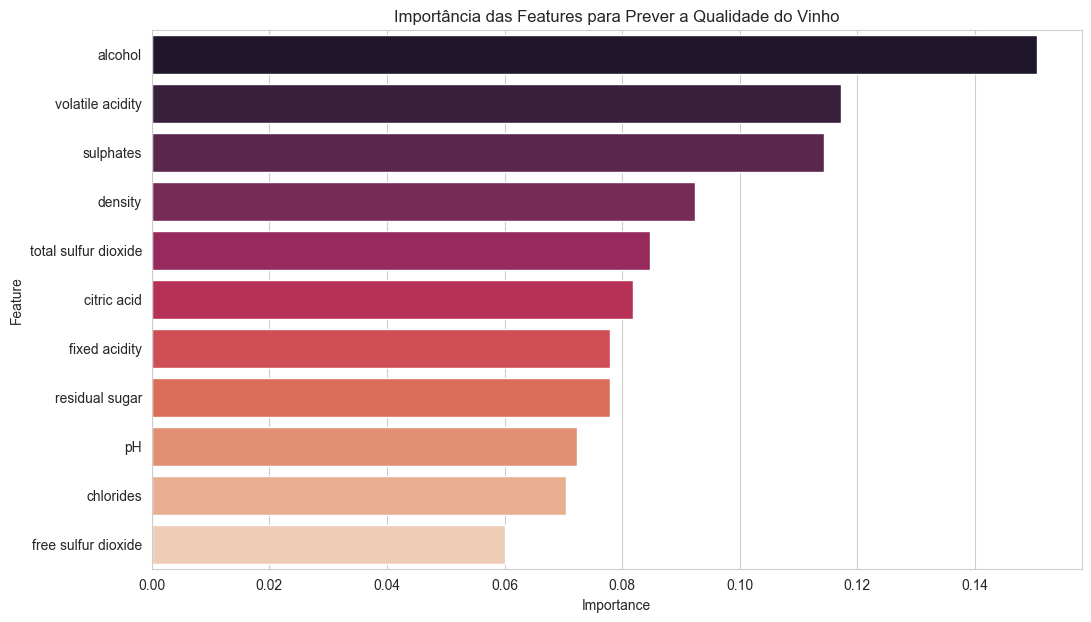

In [27]:
# Extrair a importância das features
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar a importância
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Importância das Features para Prever a Qualidade do Vinho')
plt.show()

## Conclusão

## Resumo do Projeto
Neste projeto, realizamos uma análise completa do dataset de vinhos tintos com o objetivo de identificar os fatores que mais influenciam a qualidade e construir um modelo preditivo. O problema foi abordado como uma tarefa de classificação, categorizando os vinhos em "Ruim", "Médio" e "Bom".

## Principais Descobertas (Preencha com seus resultados)

* **Performance do Modelo:** O modelo `RandomForestClassifier` alcançou uma acurácia geral de aproximadamente **[83%]** no conjunto de teste. O modelo demonstrou ser especialmente eficaz em identificar os vinhos de qualidade "Média", mas teve mais dificuldade com as classes minoritárias ("Ruim" e "Bom") devido ao desbalanceamento dos dados.

* **Fatores Mais Influentes:** A análise de importância das features revelou que os preditores mais significativos para a qualidade do vinho foram, em ordem:
    1.  **Álcool (`alcohol`):** O fator com maior impacto positivo.
    2.  **Acidez Volátil (`volatile acidity`):** O principal fator com impacto negativo.
    3.  **Sulfatos (`sulphates`):** Também positivamente correlacionado.
    4.  **Densidade (`density`)** e **Ácido Cítrico (`citric acid`)** também mostraram relevância.

* **Insights da Análise Exploratória:** A análise confirmou que vinhos com notas mais altas tendem a ter, em média, maior teor alcoólico e menor acidez volátil.


